In [3]:
!pip install dtreeviz

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

In [86]:
#! python3 -m pip install xgboost
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 2.1 MB/s eta 0:00:00


In [88]:
import xgboost

In [89]:
from xgboost import XGBClassifier

In [103]:
import plotly.express as px

In [17]:
df = pd.read_csv('C:/Users/balod/Documents/Lung Cancer Research/dataset_lung_cancer.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [18]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

<Axes: >

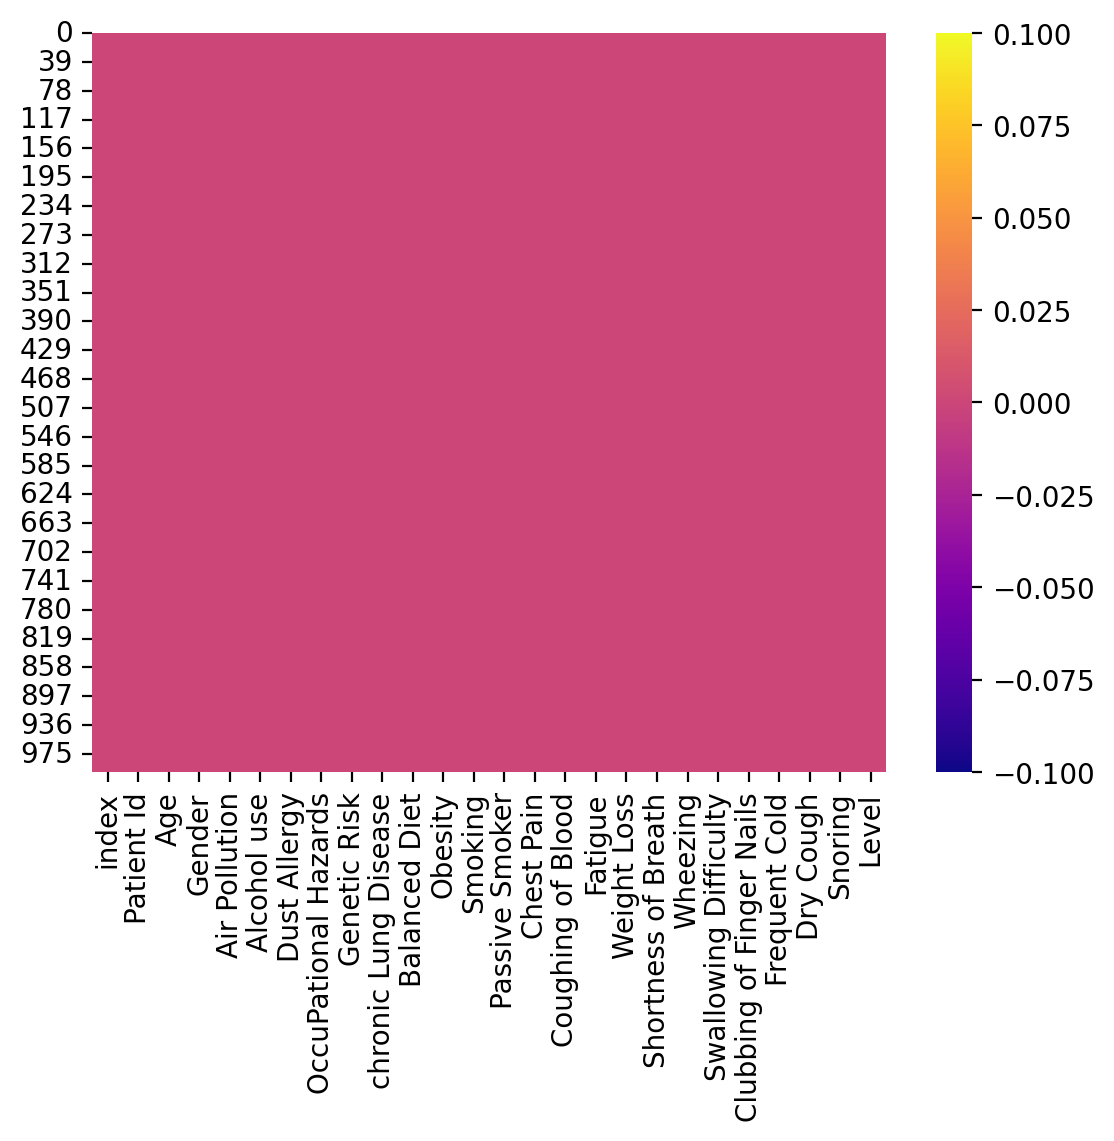

In [19]:
sns.heatmap(df.isnull(), cmap = 'plasma') #viridis, magma, plasma,inferno, cividis,cool,hot

In [20]:
df.drop(columns=['index', 'Patient Id'], axis=1, inplace=True)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [21]:
df.size

24000

In [22]:
df.dtypes

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

<Axes: title={'center': 'Dataset Details'}>

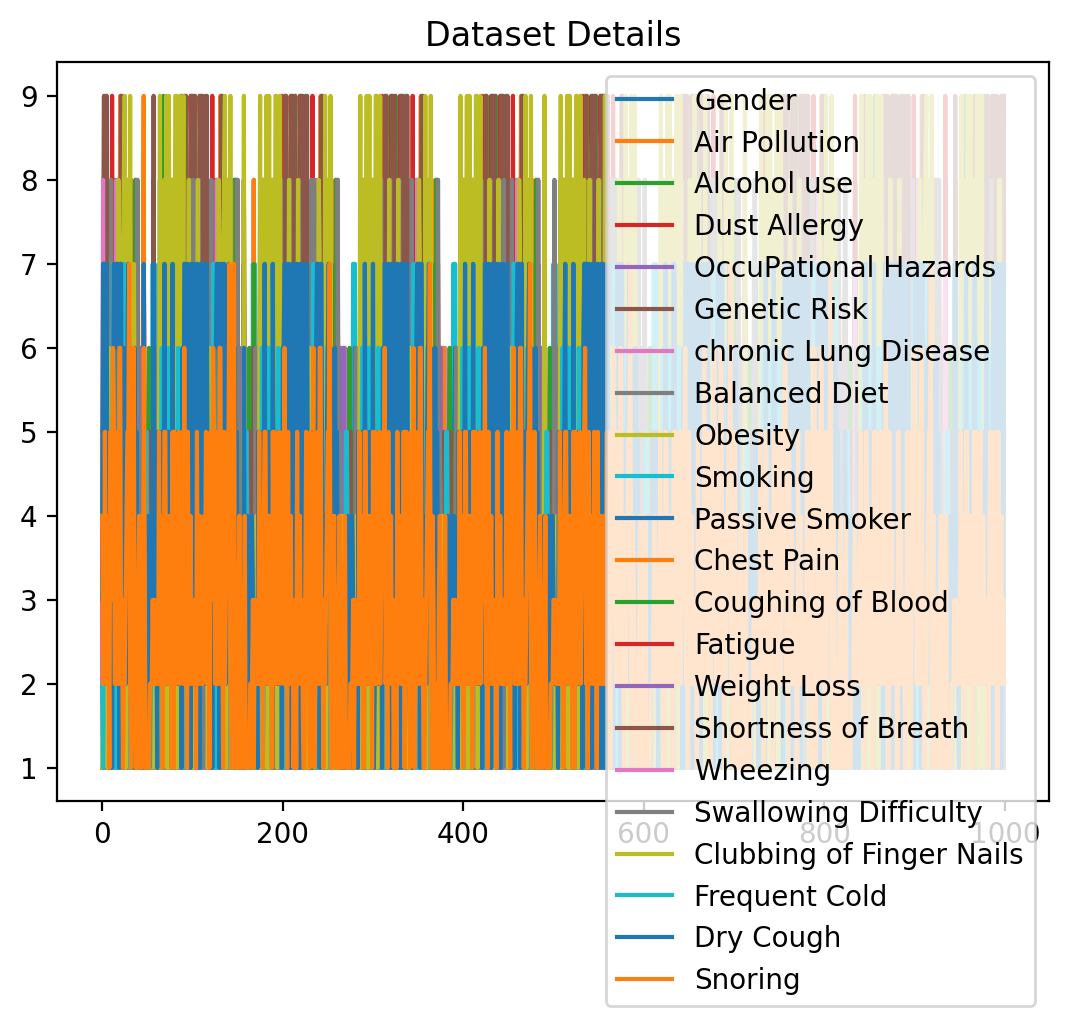

In [33]:
df.iloc[:, 1:24].plot(title="Dataset Details")

In [24]:
df_corr = df.corr()
df_corr

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.814805,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422


<Axes: title={'center': 'Correlation Matrix'}>

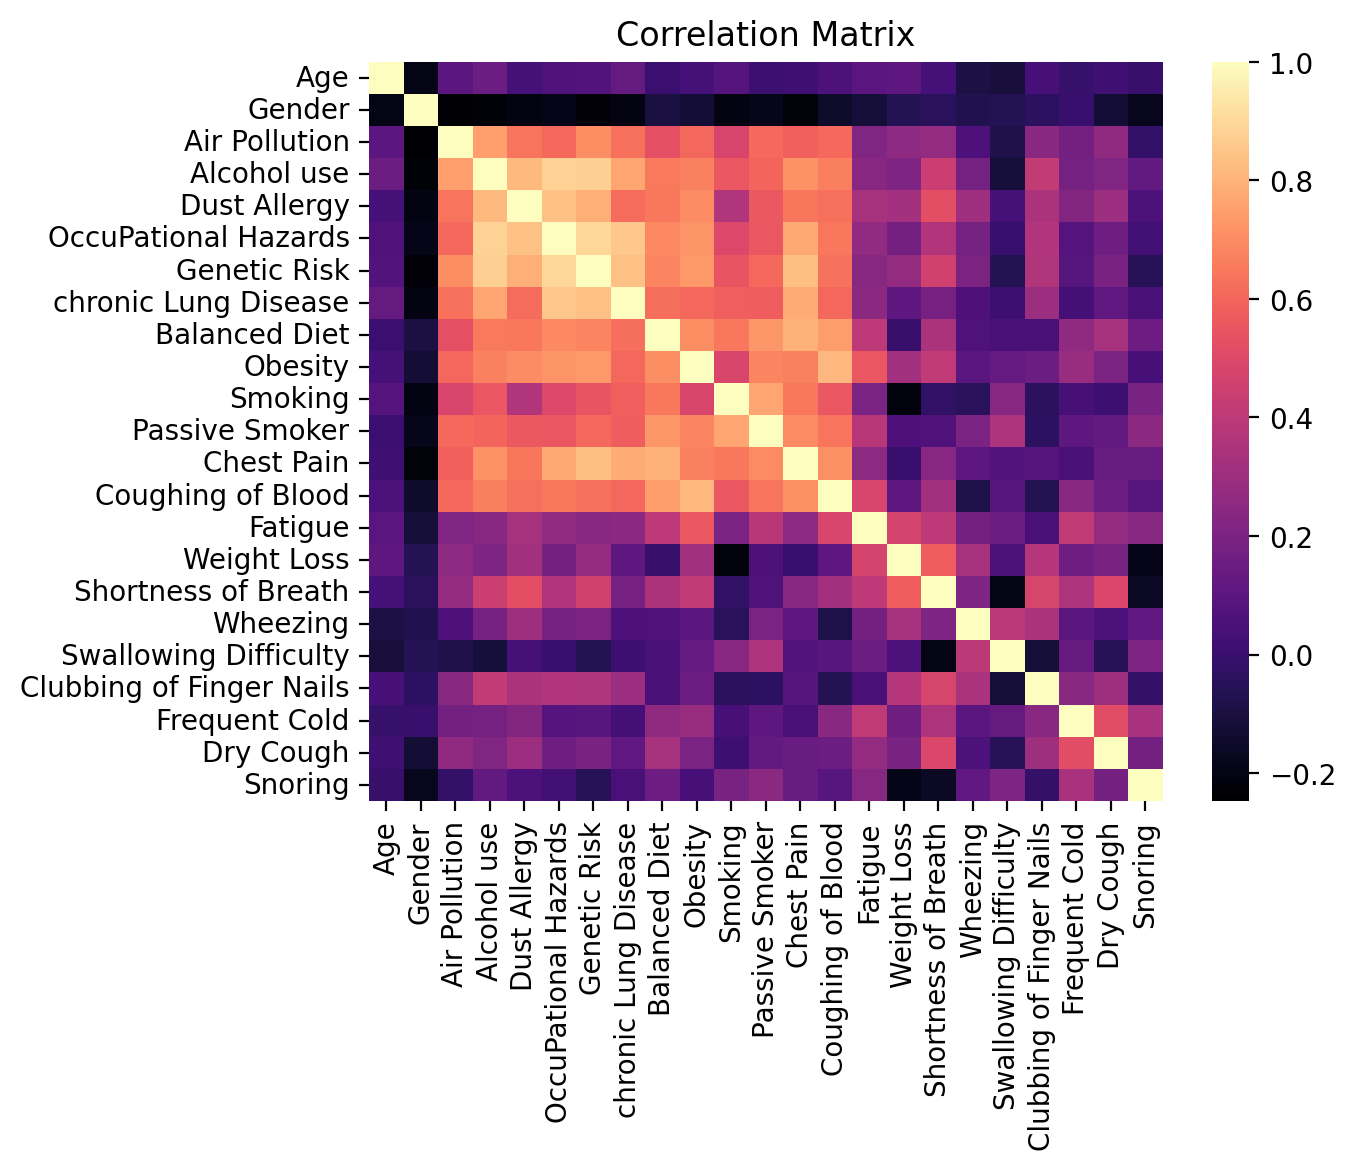

In [25]:
plt.title("Correlation Matrix")
sns.heatmap(df_corr, cmap='magma')

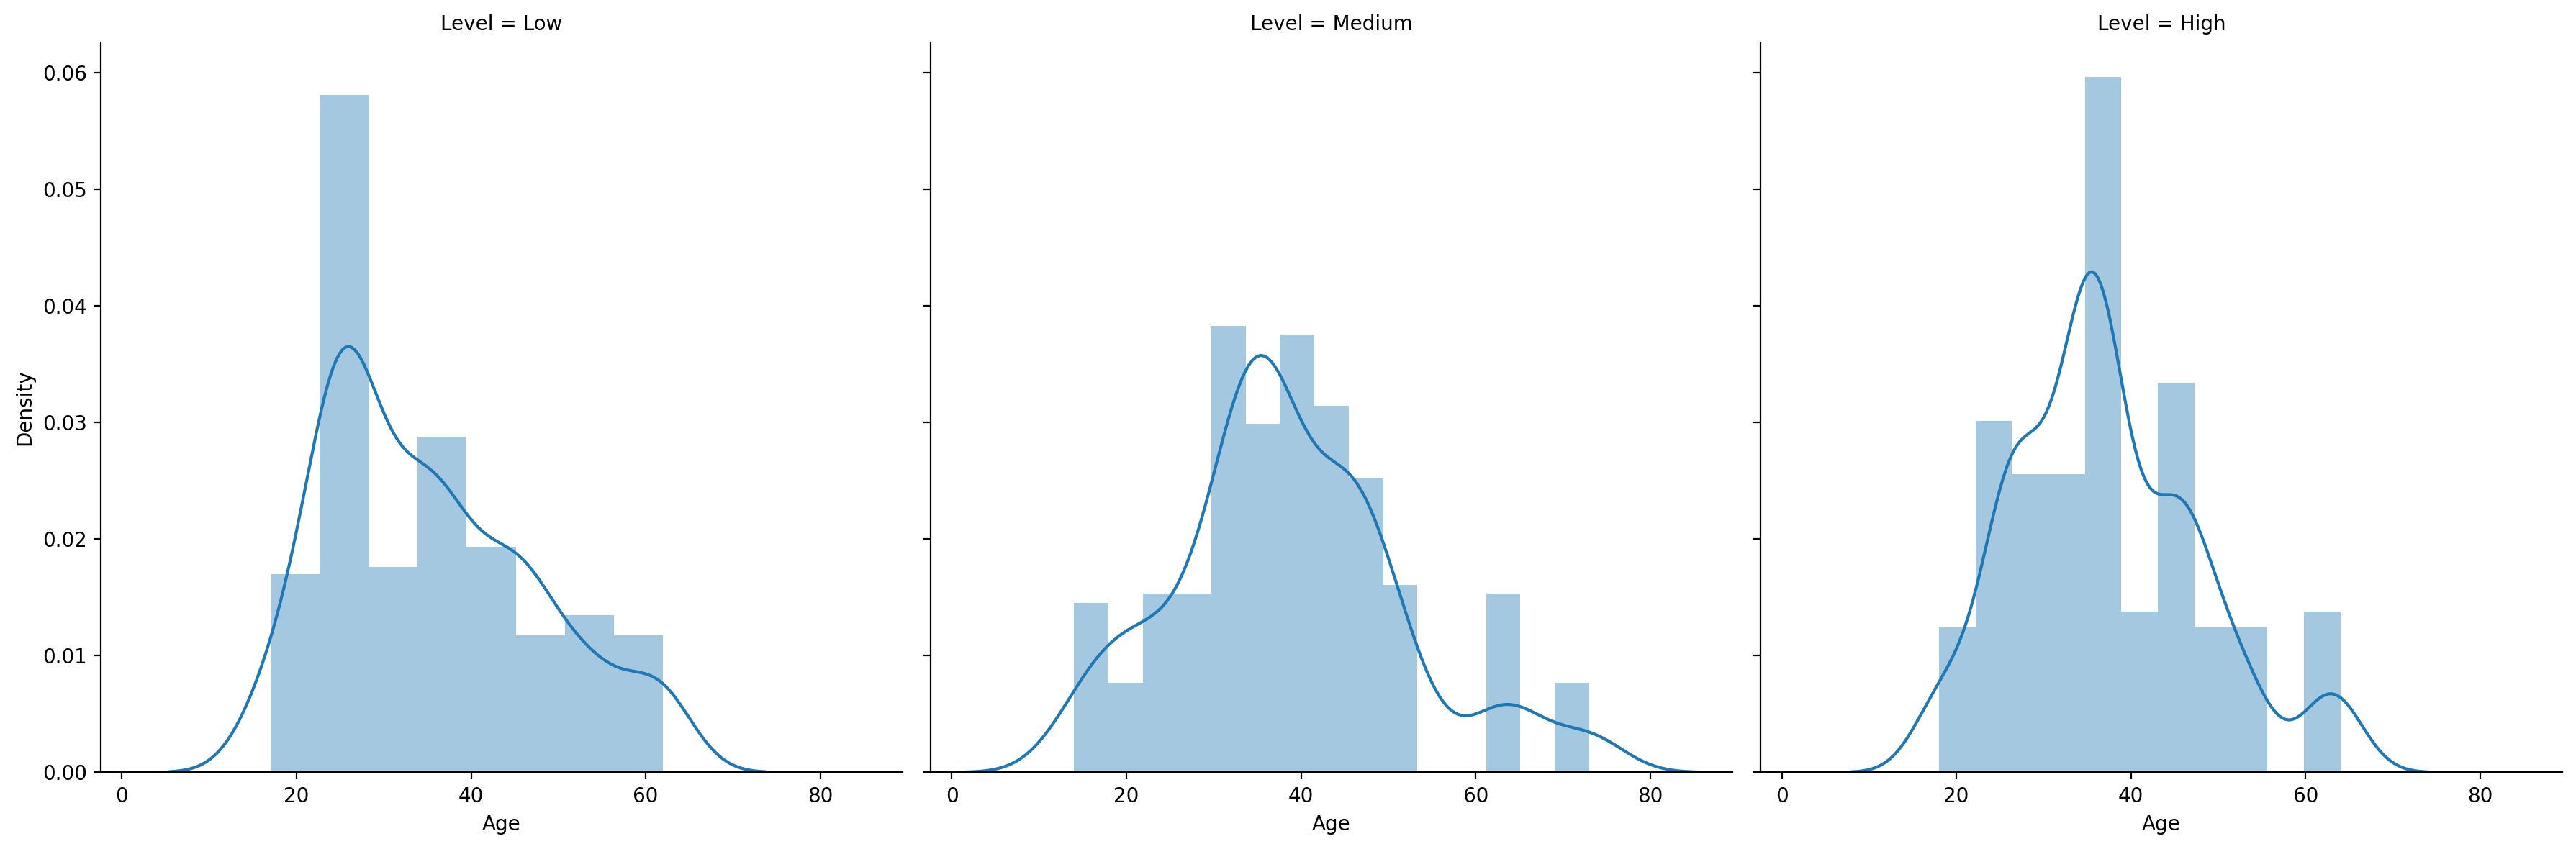

In [27]:
sea = sns.FacetGrid(df, col = "Level", height = 6)
sea.map(sns.distplot, "Age")

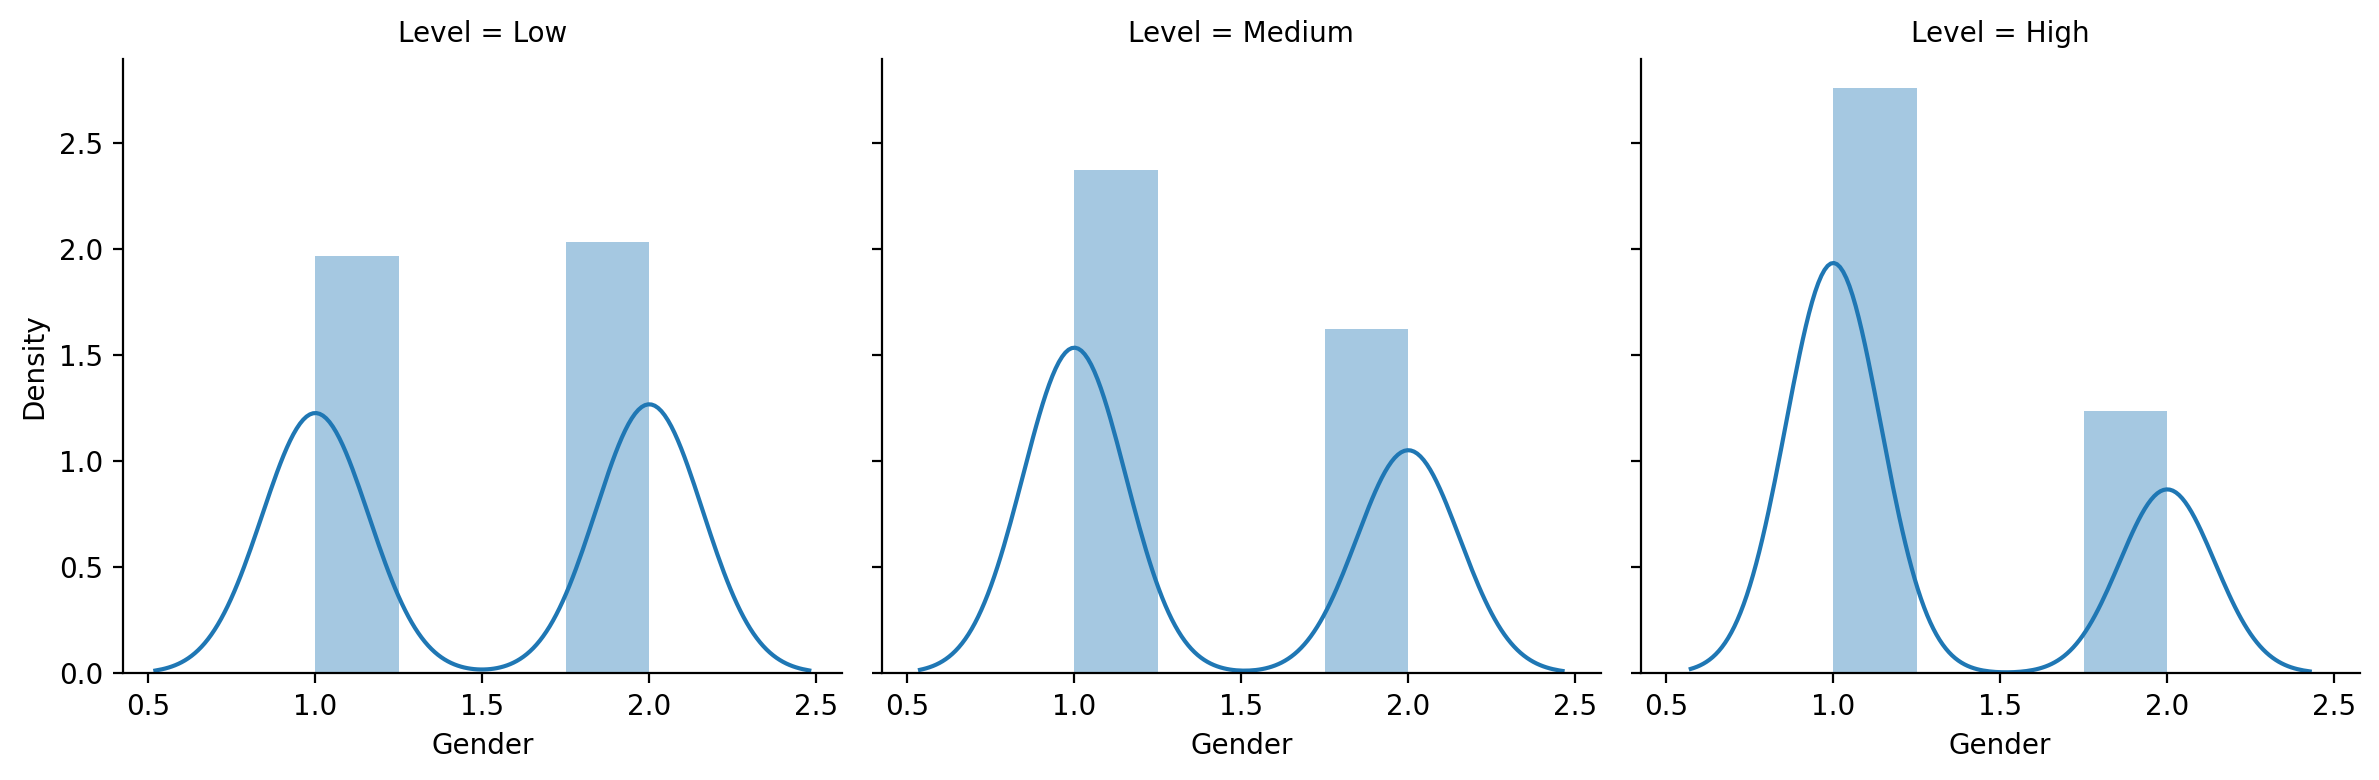

In [28]:
sea = sns.FacetGrid(df, col = "Level", height = 4)
sea.map(sns.distplot, "Gender")

In [31]:
x = df.iloc[:, 0:23]
x

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
996,37,2,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4
997,25,2,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
998,18,2,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [34]:
x = x.values
x

array([[33,  1,  2, ...,  2,  3,  4],
       [17,  1,  3, ...,  1,  7,  2],
       [35,  1,  4, ...,  6,  7,  2],
       ...,
       [25,  2,  4, ...,  6,  7,  2],
       [18,  2,  6, ...,  4,  2,  3],
       [47,  1,  6, ...,  6,  7,  2]], dtype=int64)

In [35]:
df['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [36]:
df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [37]:
df['Level'].replace(to_replace = 'Low', value = 0, inplace = True)
df['Level'].replace(to_replace = 'Medium', value = 1, inplace = True)
df['Level'].replace(to_replace = 'High', value = 2, inplace = True)

df['Level'].value_counts()

2    365
1    332
0    303
Name: Level, dtype: int64

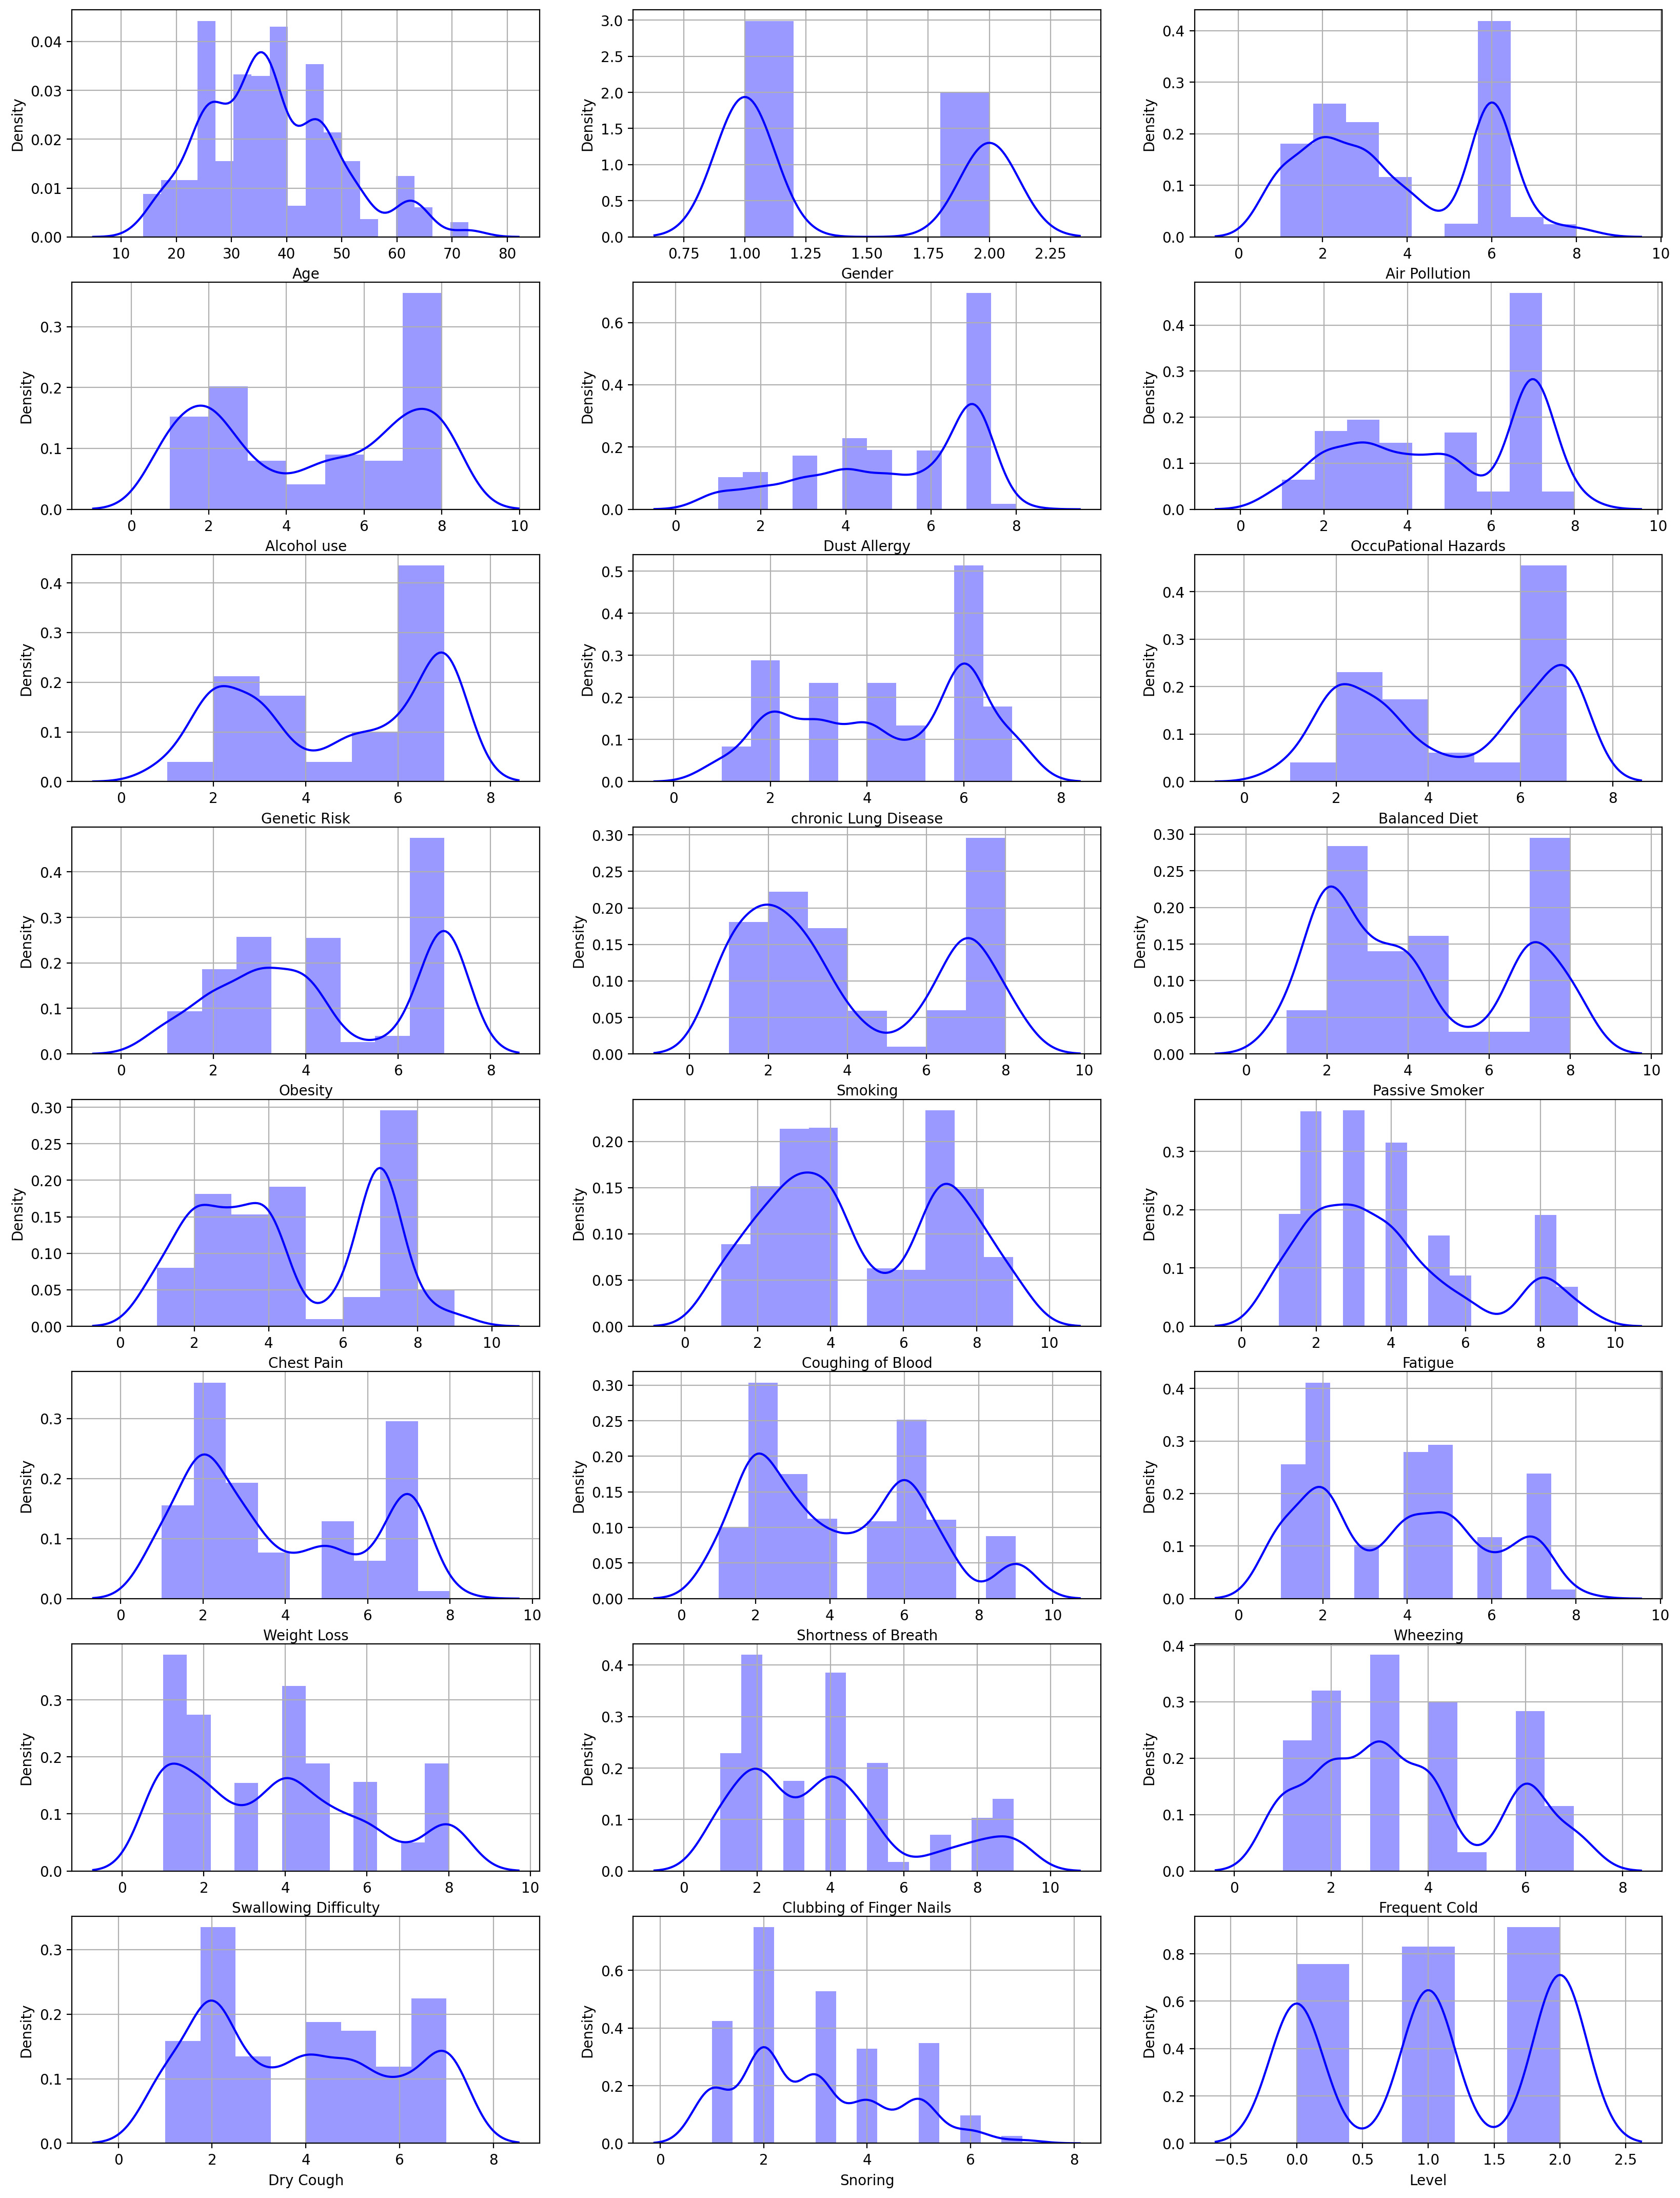

In [40]:
plt.figure(figsize = (20, 27))

for i in range(24):
    plt.subplot(8, 3, i+1)
    sns.distplot(df.iloc[:, i], color = 'blue')
    plt.grid()

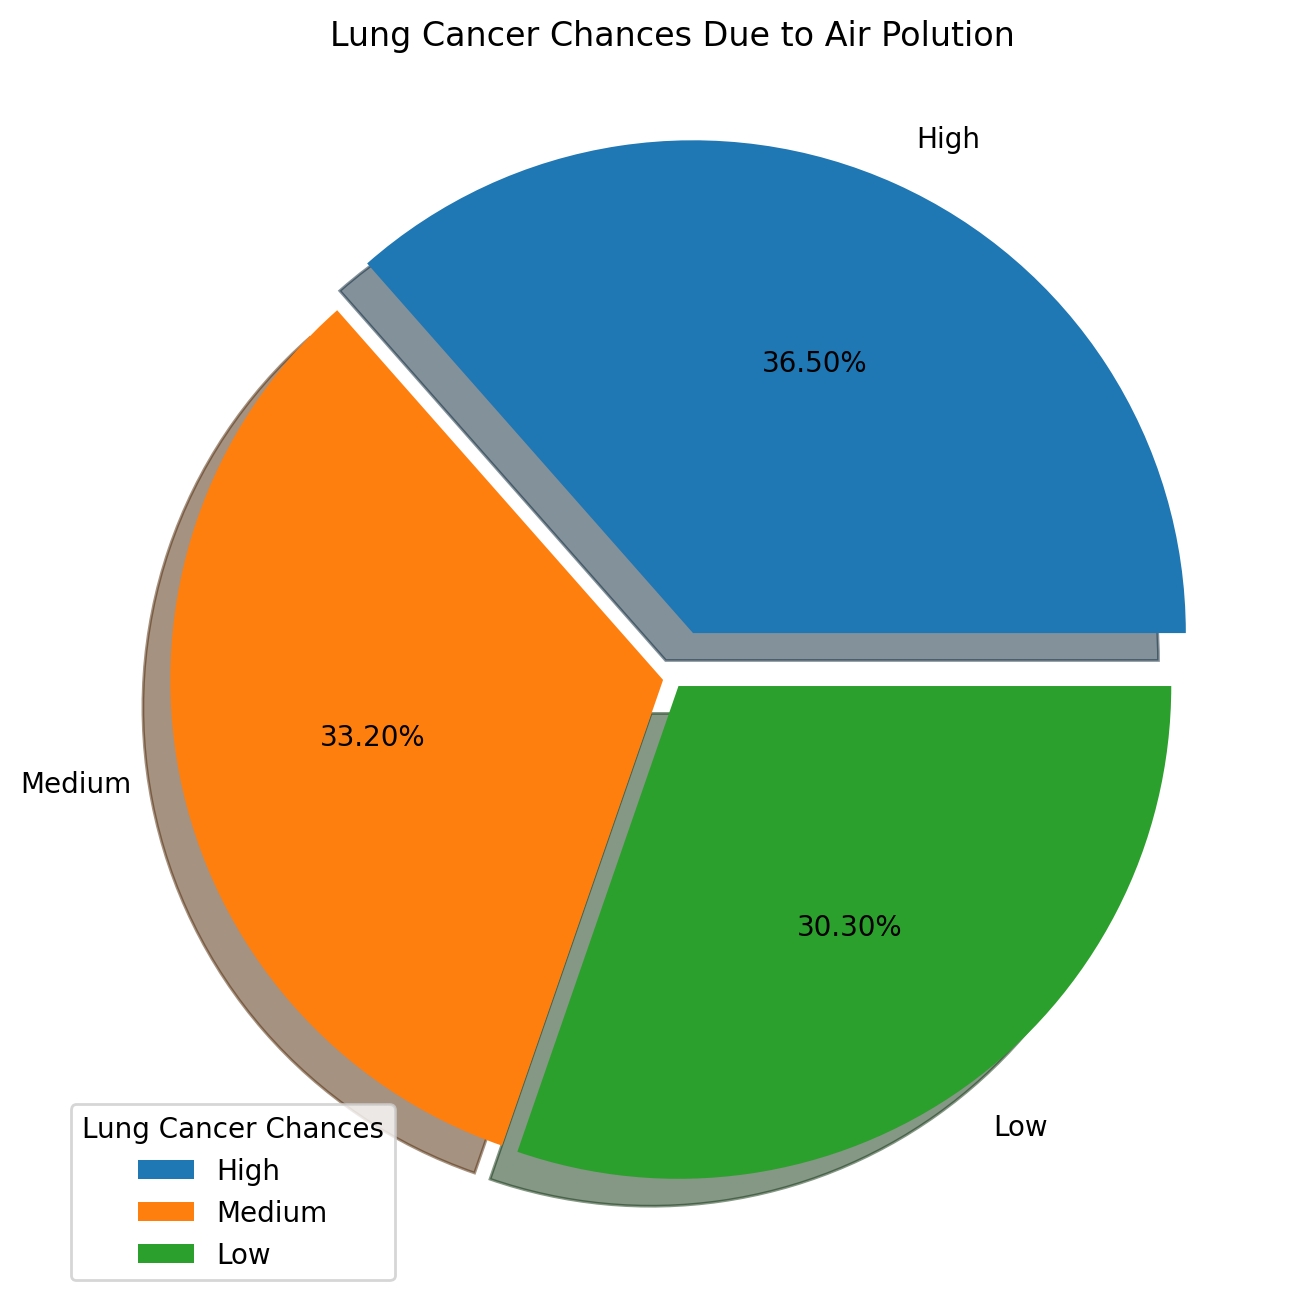

In [46]:
plt.figure(figsize = (10, 8))
plt.title("Lung Cancer Chances Due to Air Polution")
plt.pie(df['Level'].value_counts(), explode = (0.1, 0.02, 0.02), labels = ['High', 'Medium', 'Low'], autopct = "%1.2f%%", shadow = True)
plt.legend(title = "Lung Cancer Chances", loc = "lower left")

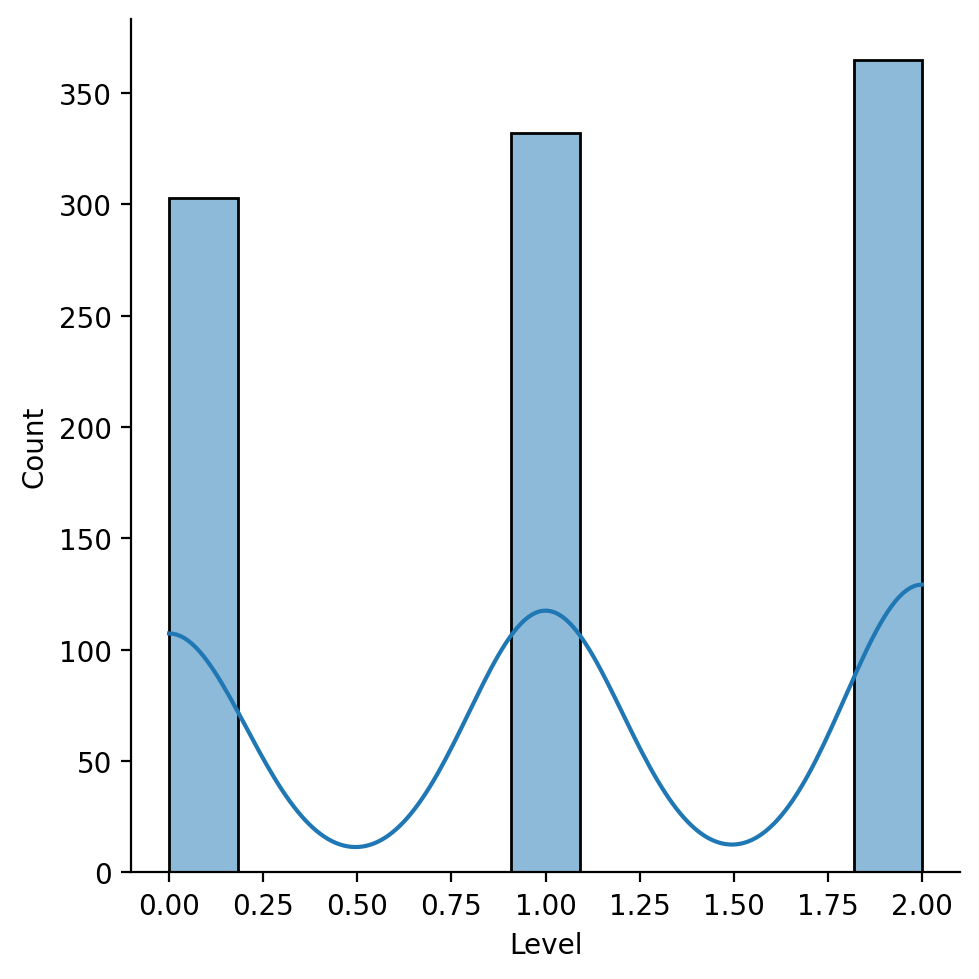

In [49]:
sns.displot(df['Level'], kde=True)

In [50]:
y = df.Level.values
y

array([0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,


	Smoking and Label of Lung Cancer


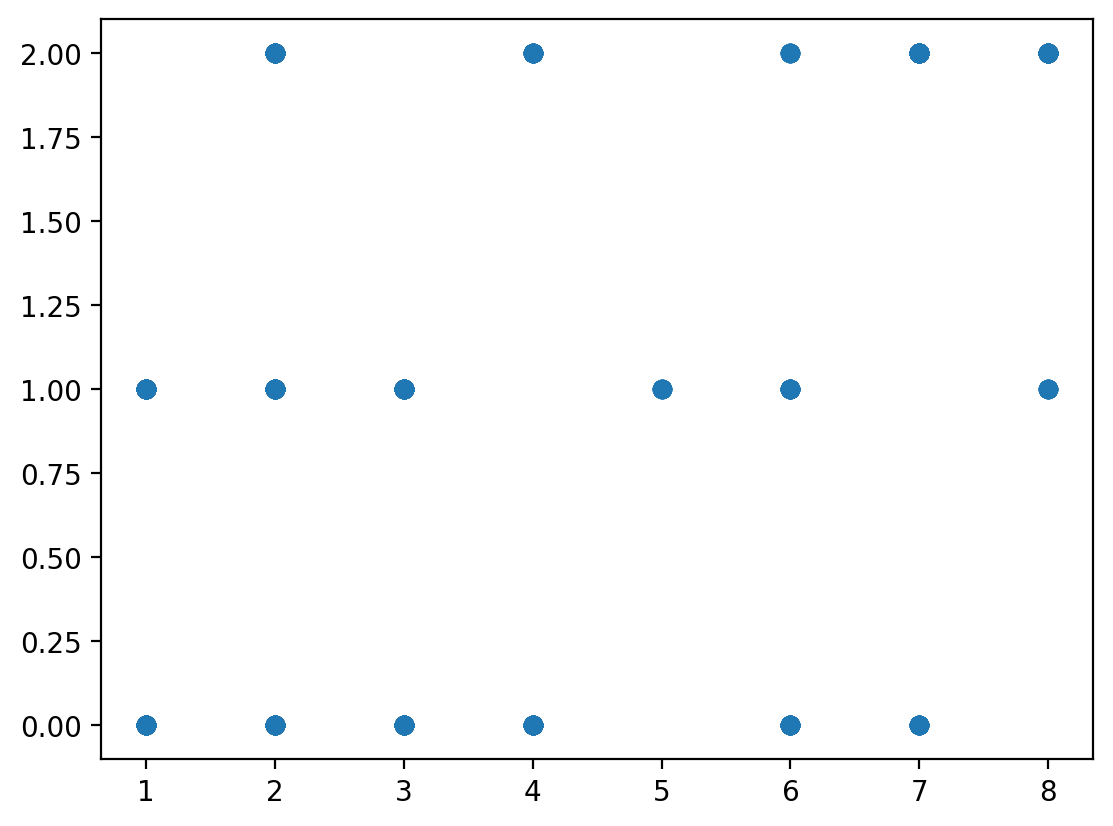




	Air Polution and Label of Lung Cancer


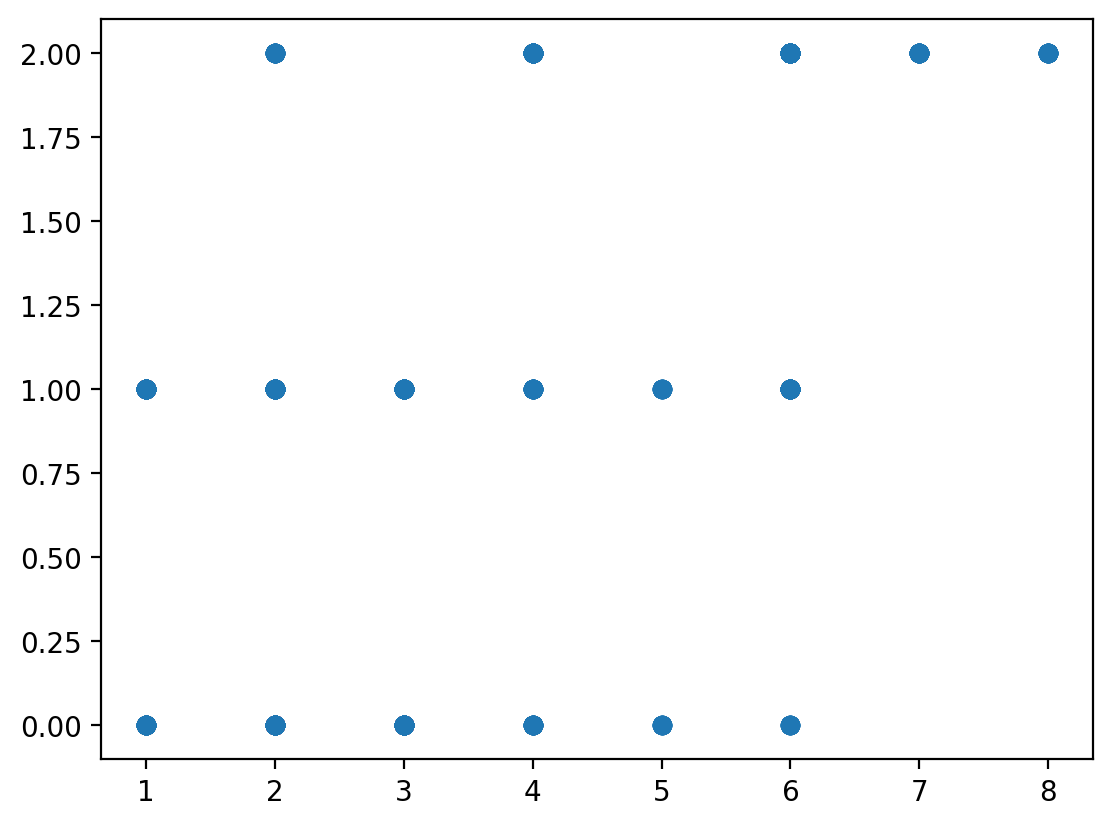

In [101]:
# Scatter Plot

print('\n\tSmoking and Label of Lung Cancer')
plt.scatter(df['Smoking'], df['Level'])
plt.show()
print('\n')

print('\n\tAir Polution and Label of Lung Cancer')
plt.scatter(df['Air Pollution'], df['Level'])
plt.show()
print('\n')

In [184]:
# Animated Scatter Plot

px.scatter(data_frame=df,
          x='Age',
           y='Smoking',
           size='Air Pollution',
           color='Level',
           title='Age, Smoking and Air Polution',
           labels={
               'Age': 'Age',
               'Air Pollution': 'Air Polution',
               'Level': 'Lung Cancer Level',
               'Smoking': 'Smoking',
               'Sender': 'Gender'
           },
           log_x=True,
           range_y=[-5,15],
           hover_name='Level',
           animation_frame='Gender',
           height=800,
           size_max=100
          )

In [ ]:
#Train and Test Splitting The Data- x are Independent Variable(All the features-0 to 23), y is Target Variable(LEVEL)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
#Function of Measure Performance

In [52]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])
    cm.plot()

In [ ]:
#Random Forest

In [53]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
y_pred_rf = model_rf.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[ 89   0   0]
 [  0  96   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

******************************************************



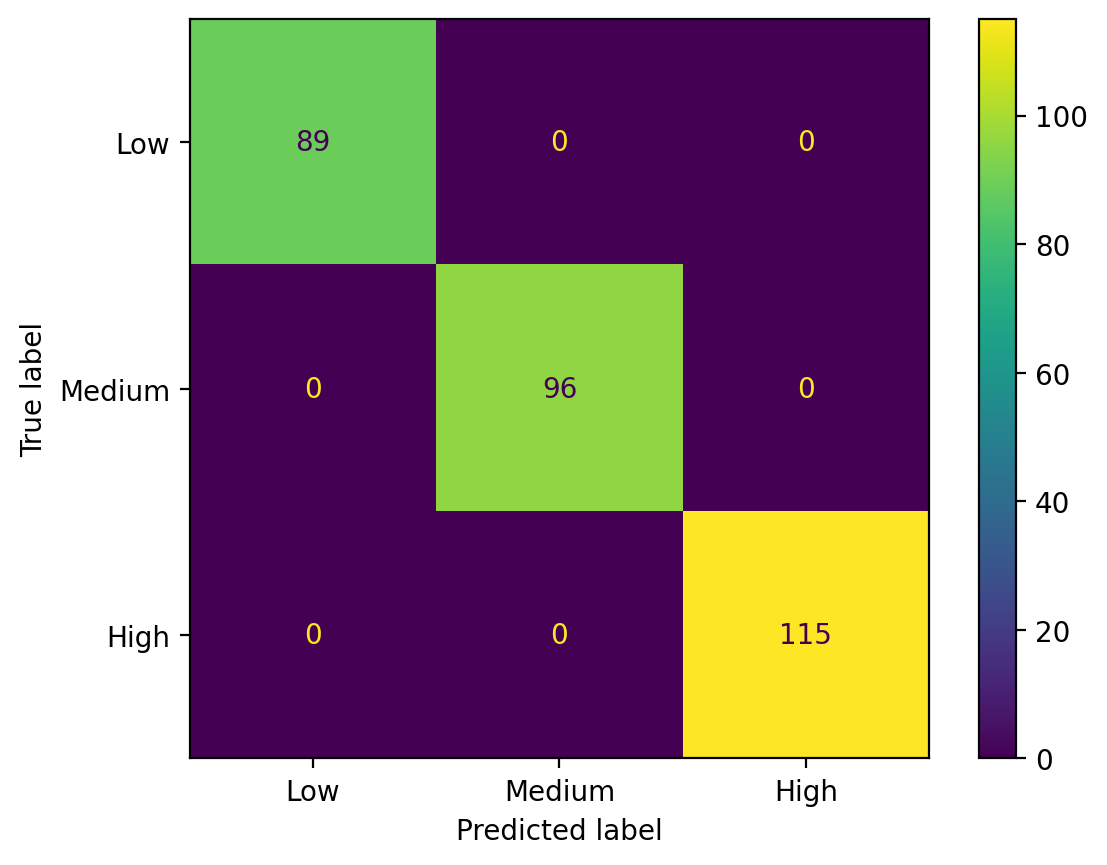

In [55]:
perform(y_pred_rf)

In [120]:
score_rf= model_rf.score(x_test, y_test)
print("Random Forest Score= ", score_rf)
print("\n")

Random Forest Score=  1.0




In [ ]:
#Saving the Random Forest Model

In [56]:
filename = 'Lung_Cancer_RF.h5'
pickle.dump(model_rf, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


In [ ]:
#ADABoost Classifier

In [57]:
model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)

AdaBoostClassifier()

In [58]:
y_pred_ada = model_ada.predict(x_test)

Precision :  0.7033333333333334
Recall :  0.7033333333333334
Accuracy :  0.7033333333333334
F1 Score :  0.7033333333333334

 [[  0  89   0]
 [  0  96   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.52      1.00      0.68        96
           2       1.00      1.00      1.00       115

    accuracy                           0.70       300
   macro avg       0.51      0.67      0.56       300
weighted avg       0.55      0.70      0.60       300

******************************************************



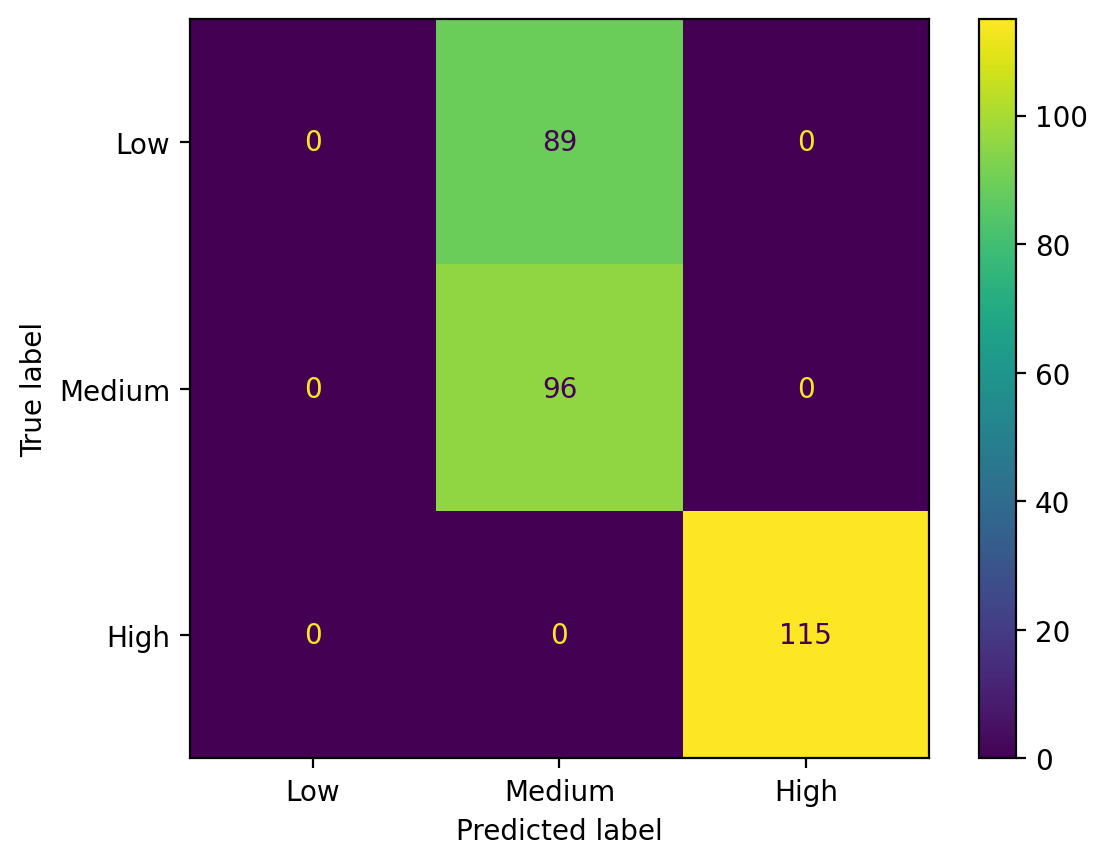

In [59]:
perform(y_pred_ada)

In [119]:
score_ada= model_ada.score(x_test, y_test)
print("ADABoost Classifier Score= ", score_ada)
print("\n")

ADABoost Classifier Score=  0.7033333333333334




In [ ]:
#Saving the ADABoost Classifier Model

In [60]:
filename = 'Lung_Cancer_ADA.h5'
pickle.dump(model_ada, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


In [ ]:
#Extra Trees Classifier

In [61]:
model_etc = ExtraTreesClassifier()
model_etc.fit(x_train, y_train)

ExtraTreesClassifier()

In [62]:
y_pred_etc = model_etc.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[ 89   0   0]
 [  0  96   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

******************************************************



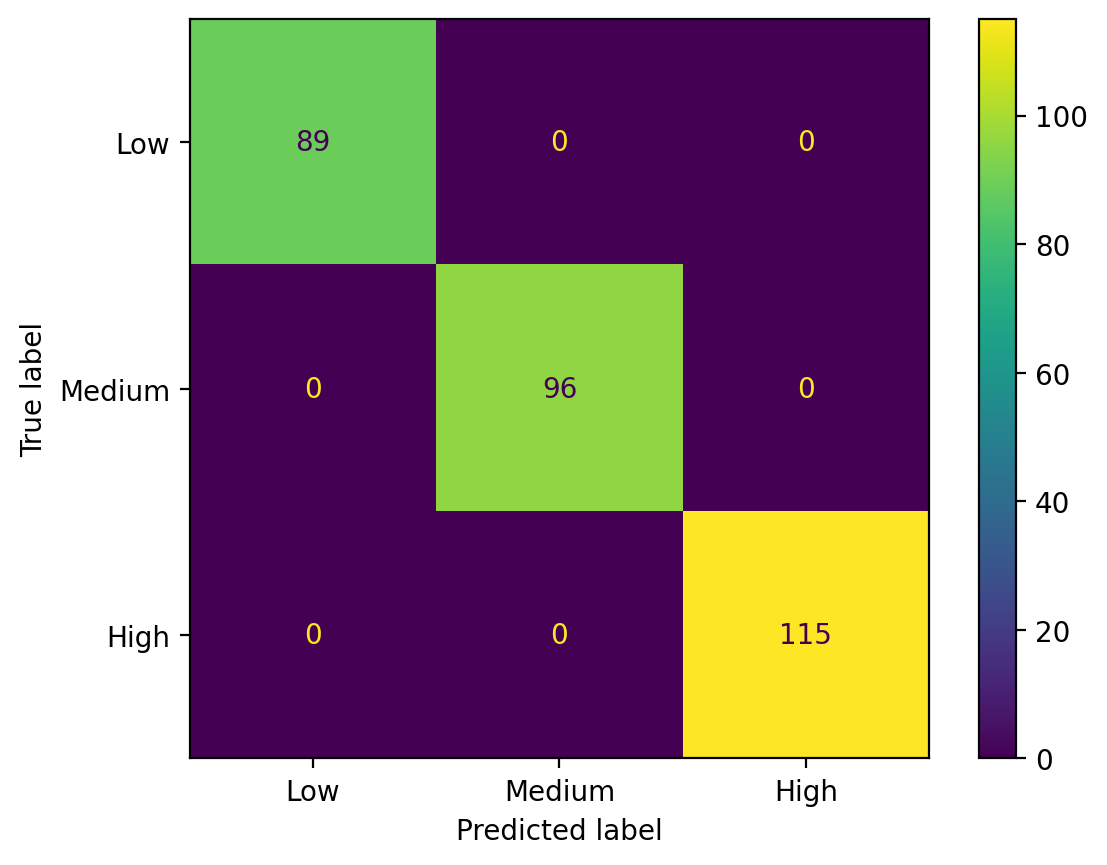

In [63]:
perform(y_pred_etc)

In [118]:
score_etc= model_etc.score(x_test, y_test)
print("Extra Tree Classifier Score= ", score_etc)
print("\n")

Extra Tree Classifier Score=  1.0




In [ ]:
#SAving the Extra Trees Classifier Model

In [64]:
filename = 'Lung_Cancer_ETC.h5'
pickle.dump(model_etc, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


In [ ]:
#Decision Tree

In [65]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [66]:
y_pred_dt = model_dt.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[ 89   0   0]
 [  0  96   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

******************************************************



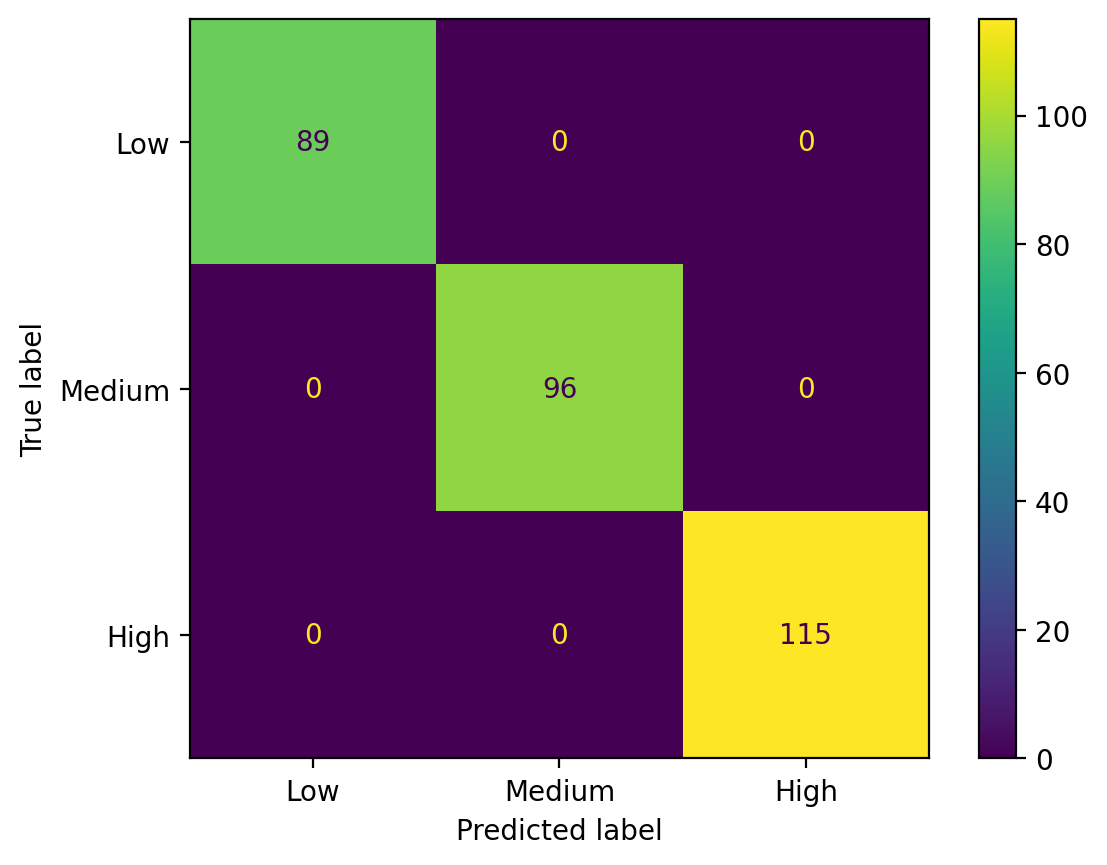

In [67]:
perform(y_pred_dt)

In [117]:
score_dt= model_dt.score(x_test, y_test)
print("Decision Tree Score= ", score_dt)
print("\n")

Decision Tree Score=  1.0




In [ ]:
#Saving the Decision Tree Model

In [68]:
filename = 'Lung_Cancer_DT.h5'
pickle.dump(model_dt, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


In [ ]:
#Decision Tree Visualization

In [69]:
feature_names = df.columns[0:23]
viz = df.copy()
viz["Level"]=viz["Level"].values.astype(str)
print(viz.dtypes)
target_names = viz['Level'].unique().tolist()

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object


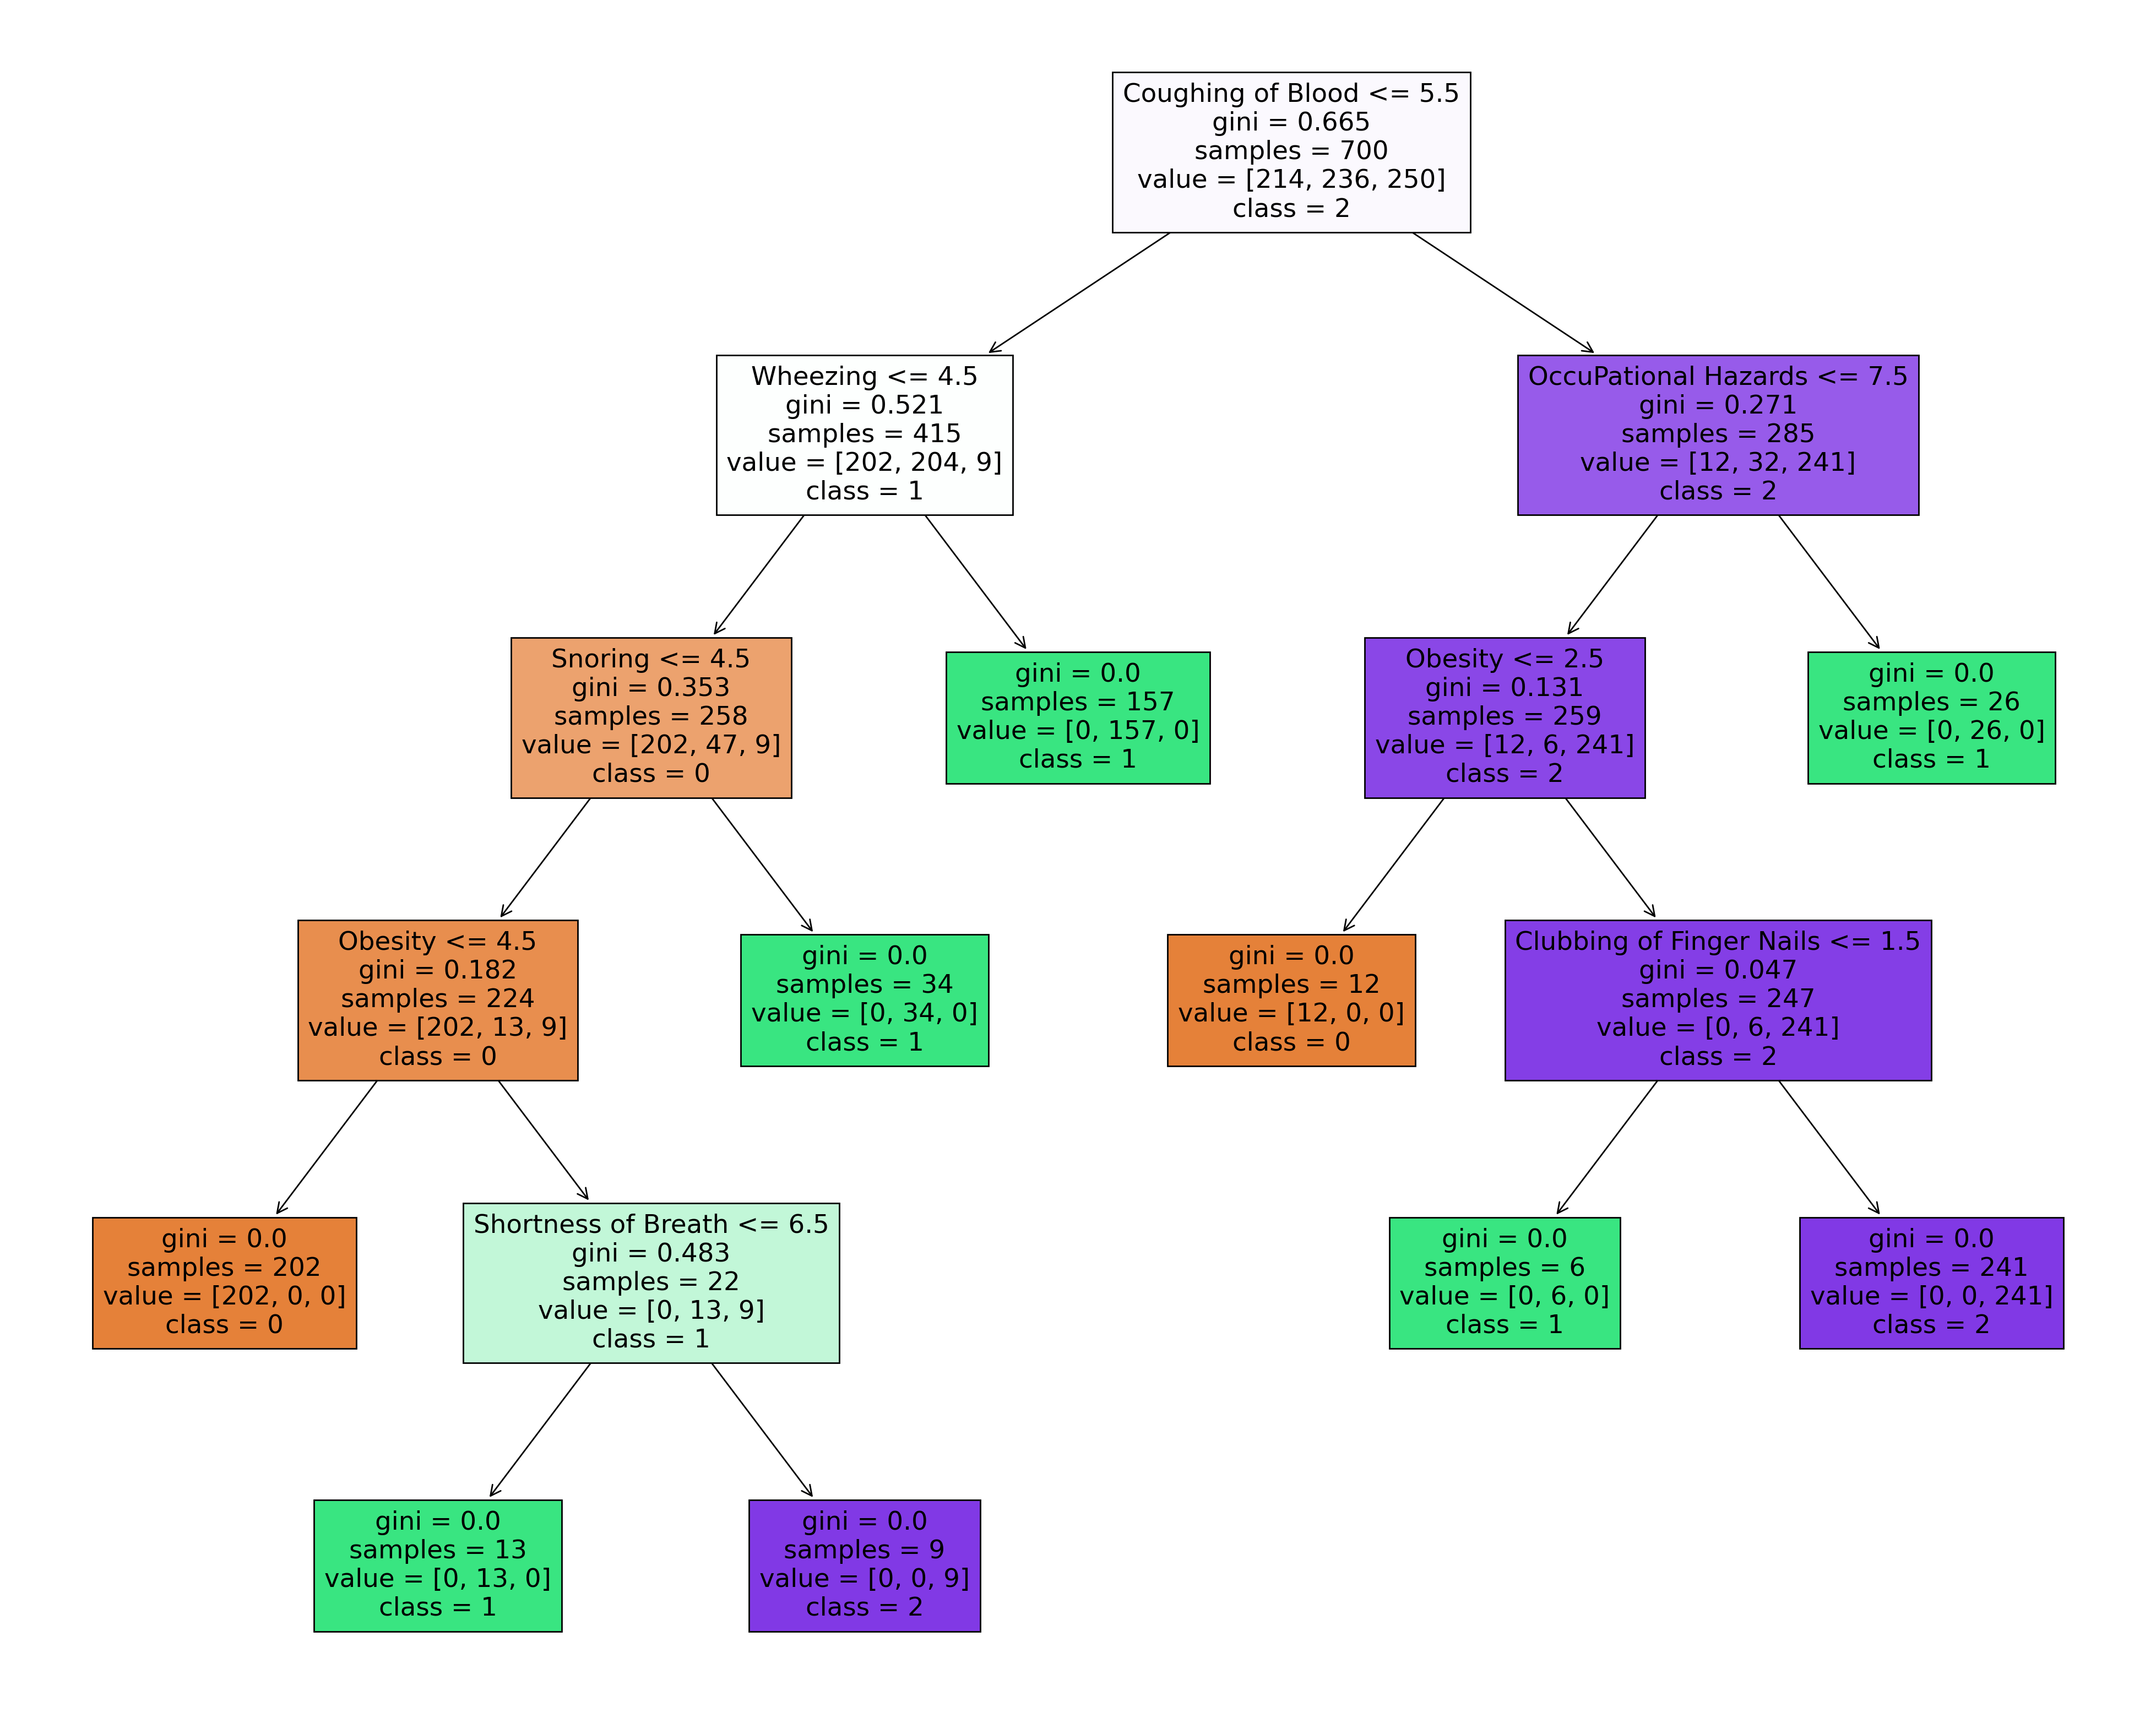

In [72]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(25, 20))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png')

In [74]:
import dtreeviz

viz_model = dtreeviz.model(model_dt,
                           X_train=x_train, y_train=y_train,
                           feature_names=feature_names,
                           target_name='Lung Cancer',
                           class_names=['Low', 'Medium', 'High'])

v = viz_model.view()     # render as SVG into internal object


In [180]:
# v.save("Lung Cancer.svg")  # save as svg

In [181]:
# viz_model.view()

In [ ]:
#Logistic Regression

In [78]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [79]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.9866666666666667
Recall :  0.9866666666666667
Accuracy :  0.9866666666666667
F1 Score :  0.9866666666666668

 [[ 89   0   0]
 [  4  92   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        89
           1       1.00      0.96      0.98        96
           2       1.00      1.00      1.00       115

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

******************************************************



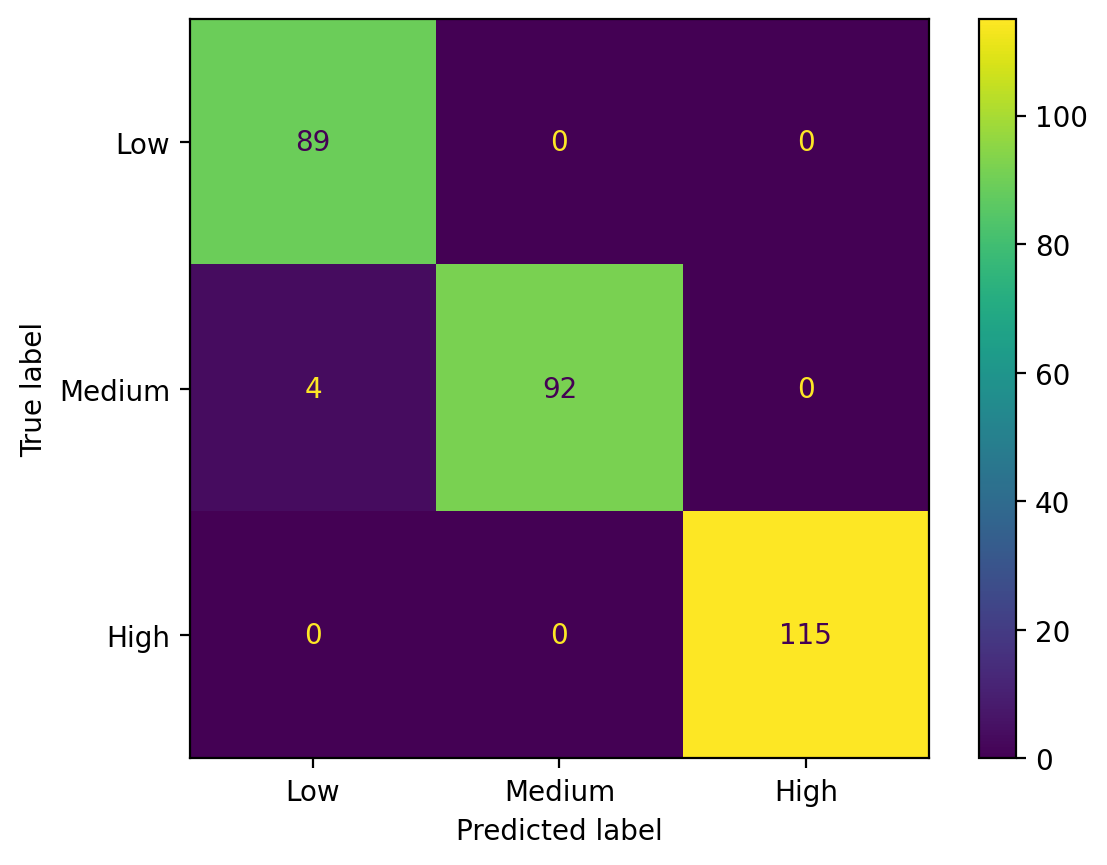

In [80]:
perform(y_pred_lr)

In [116]:
score_lr= model_lr.score(x_test, y_test)
print("Logisic Regression Score= ", score_lr)
print("\n")

Logisic Regression Score=  0.9866666666666667




In [ ]:
#Saving the Logistic Regression Model

In [81]:
filename = 'Lung_Cancer_LR.h5'
pickle.dump(model_lr, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


In [ ]:
#XGBoost Classifier

In [90]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [91]:
y_pred_xgb = model_xgb.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[ 89   0   0]
 [  0  96   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

******************************************************



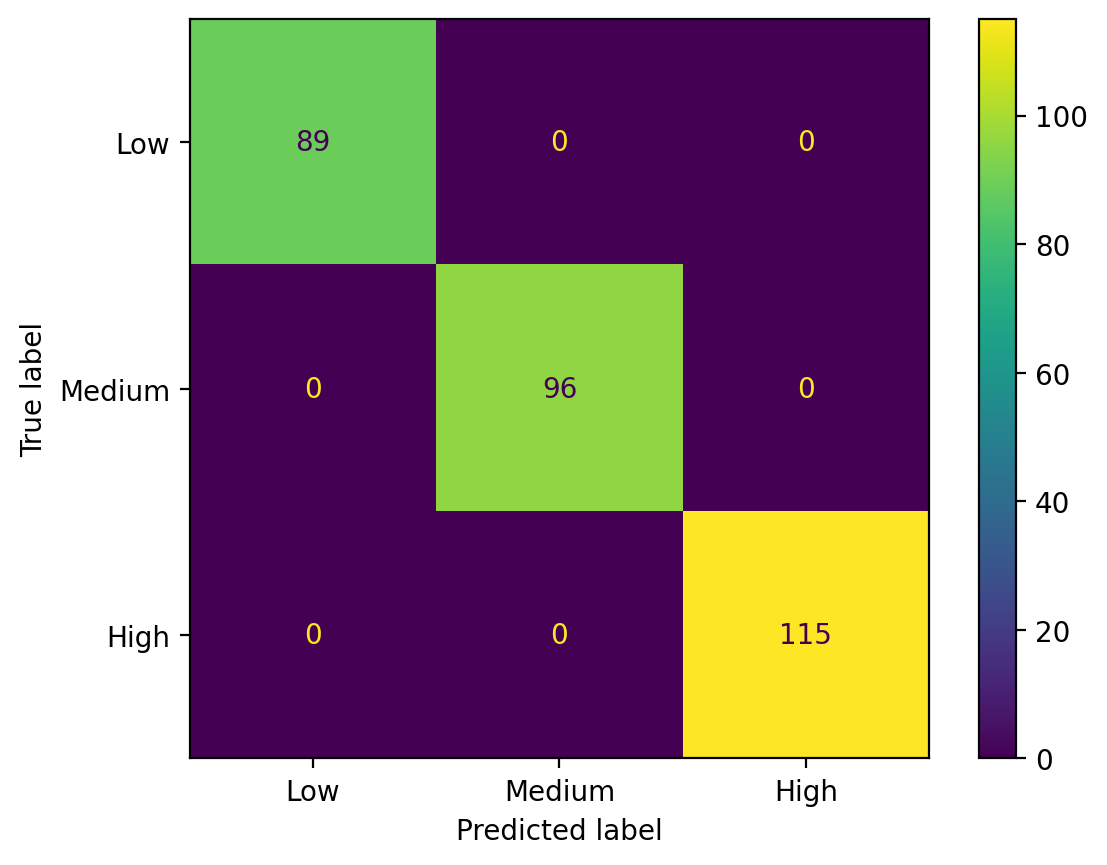

In [92]:
perform(y_pred_xgb)

In [115]:
score_xgb= model_xgb.score(x_test, y_test)
print("XGBoost Classifier Score= ", score_xgb)
print("\n")

XGBoost Classifier Score=  1.0




In [ ]:
#Saving the XGBoost Classifier Model

In [93]:
filename = 'Lung_Cancer_XGB.h5'
pickle.dump(model_xgb, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


In [94]:
#Multi-Layer Perceptron Classifier

In [95]:
model_mlp = MLPClassifier()
model_mlp.fit(x_train, y_train)

MLPClassifier()

In [96]:
y_pred_mlp = model_mlp.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[ 89   0   0]
 [  0  96   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

******************************************************



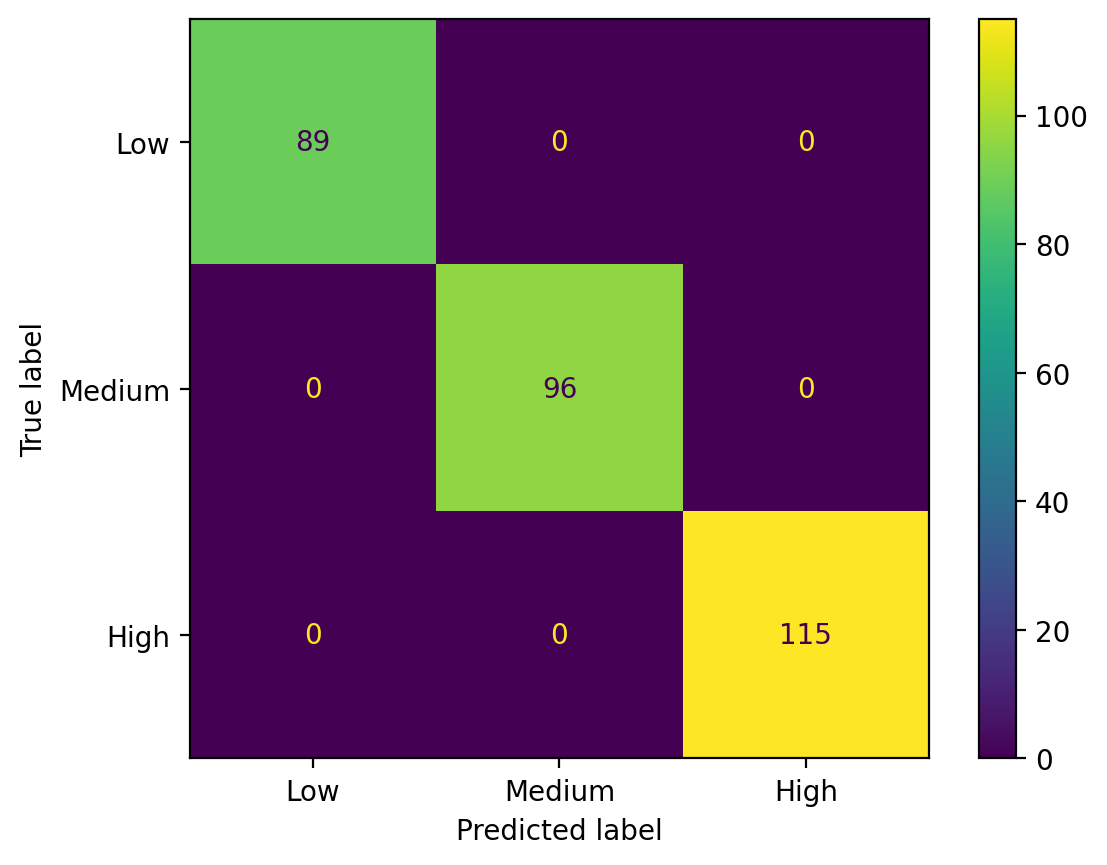

In [97]:
perform(y_pred_mlp)

In [114]:
score_mlp= model_mlp.score(x_test, y_test)
print("Multi Layer Perceptron Score= ", score_mlp)
print("\n")

Multi Layer Perceptron Score=  0.9233333333333333




In [ ]:
#Saving the Multi-Layer Perceptron Classifier Model

In [98]:
filename = 'Lung_Cancer_MLP.h5'
pickle.dump(model_mlp, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


In [ ]:
#Gaussian Naive Bayes

In [106]:
model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)

GaussianNB()

In [107]:
y_pred_gnb = model_gnb.predict(x_test)

Precision :  0.9233333333333333
Recall :  0.9233333333333333
Accuracy :  0.9233333333333333
F1 Score :  0.9233333333333333

 [[ 82   4   3]
 [  0  81  15]
 [  0   1 114]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        89
           1       0.94      0.84      0.89        96
           2       0.86      0.99      0.92       115

    accuracy                           0.92       300
   macro avg       0.94      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300

******************************************************



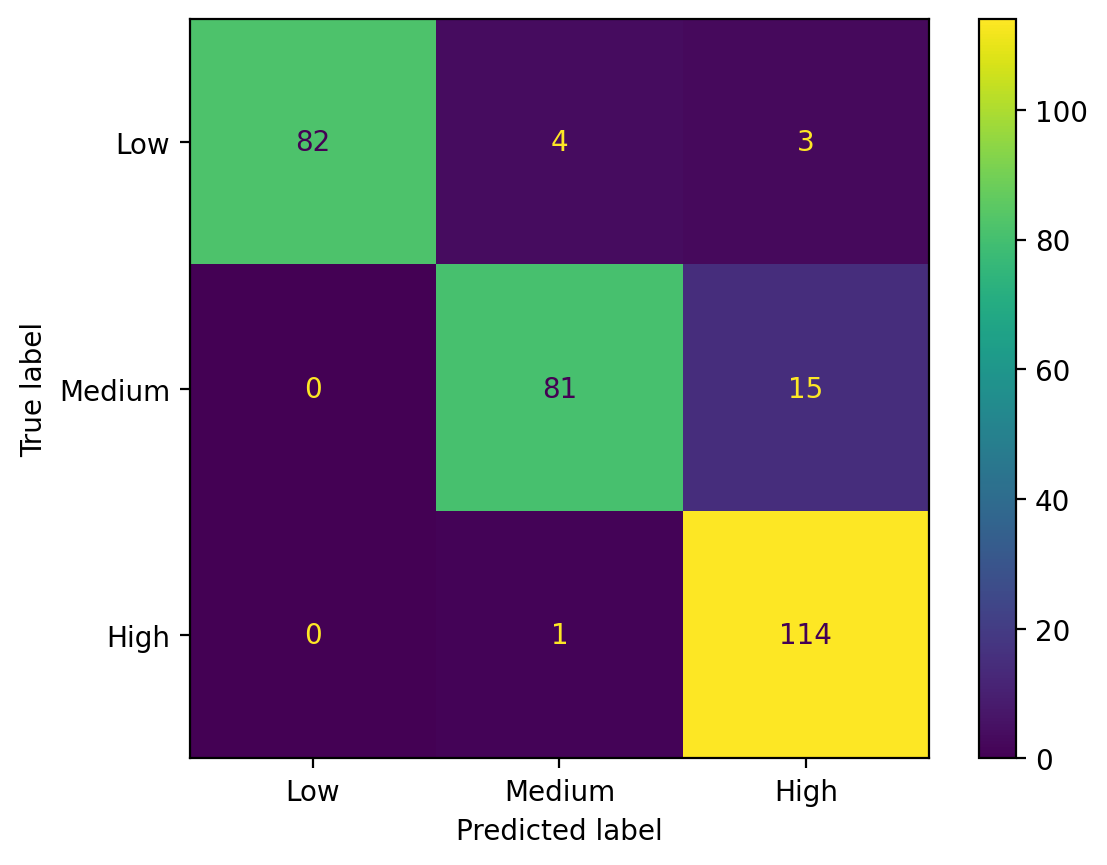

In [108]:
perform(y_pred_gnb)

In [112]:
score_gnb= model_gnb.score(x_test, y_test)
print("Gaussian Naive Bayes Score= ", score_gnb)
print("\n")

Gaussian Naive Bayes Score=  0.9233333333333333




In [ ]:
#Saving the Gaussian Naive Bayes Model

In [109]:
filename = 'Lung_Cancer_GNB.h5'
pickle.dump(model_gnb, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


In [ ]:
#All Test Score of different Classifiers

In [121]:
testscores= pd.Series([score_rf, score_ada,score_etc, score_dt, score_lr,score_xgb, score_mlp, score_gnb], 
                     index= ["Random Forest Score ", "ADABoost Classifier Score ", "Extra Tree Classifier Score ", "Decision Tree Score ",
                             "Logistic Regression Score ", "XGBoost Classifier Score ", "Multi Layer Perceptron Score ", "Gaussian Naive Bayes Score "])
print(testscores)
print("\n")

Random Forest Score              1.000000
ADABoost Classifier Score        0.703333
Extra Tree Classifier Score      1.000000
Decision Tree Score              1.000000
Logistic Regression Score        0.986667
XGBoost Classifier Score         1.000000
Multi Layer Perceptron Score     0.923333
Gaussian Naive Bayes Score       0.923333
dtype: float64




In [ ]:
#All Confusion Matrices

In [ ]:
#Comparision of Algorithm

In [127]:
x= ["RF", "ADAB", "ETC", "DT","LR", "XGB", "MLP", "GNB"]
y= [score_rf, score_ada,score_etc, score_dt, score_lr,score_xgb, score_mlp, score_gnb]

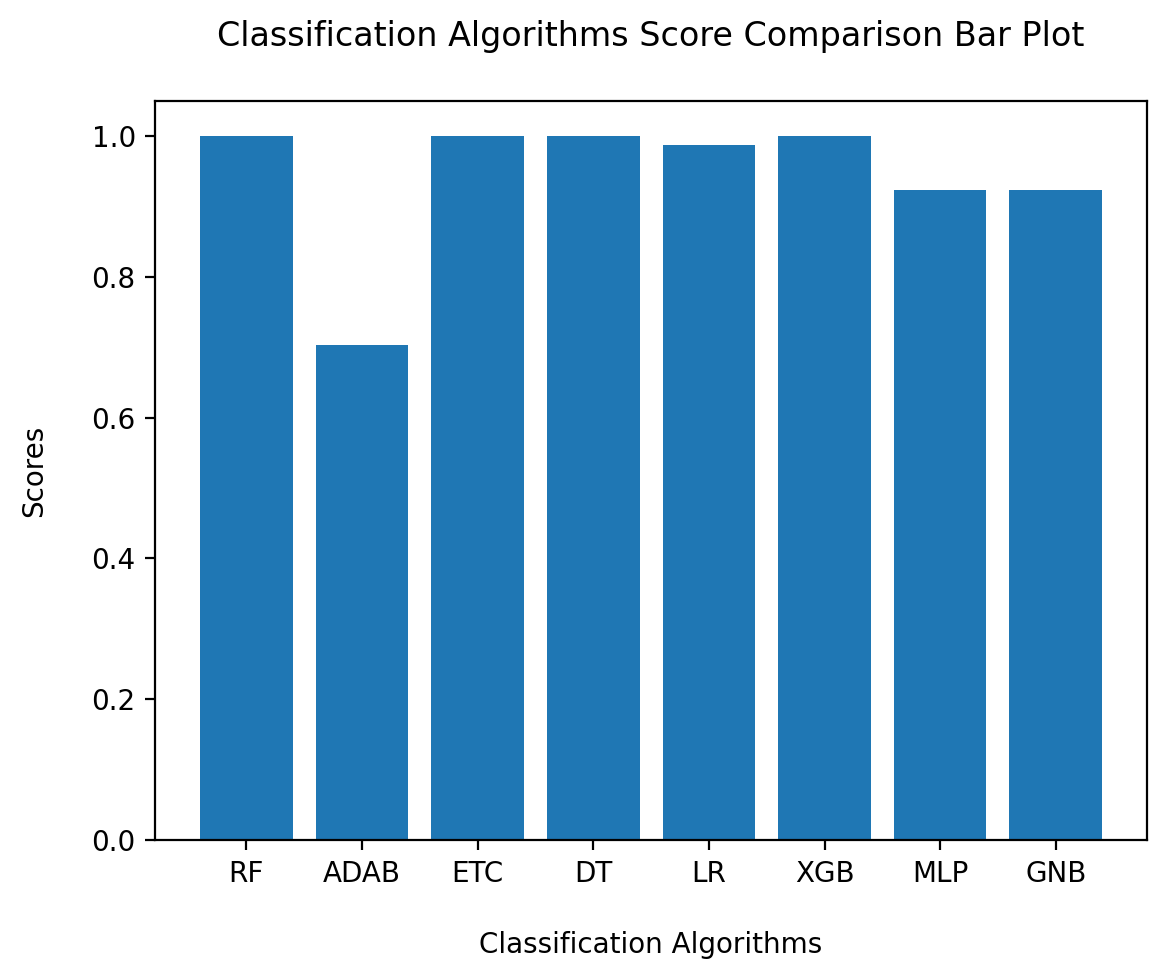

In [128]:
#Bar Plot
plt.bar(x,y)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Bar Plot\n')
plt.show()
print('\n')

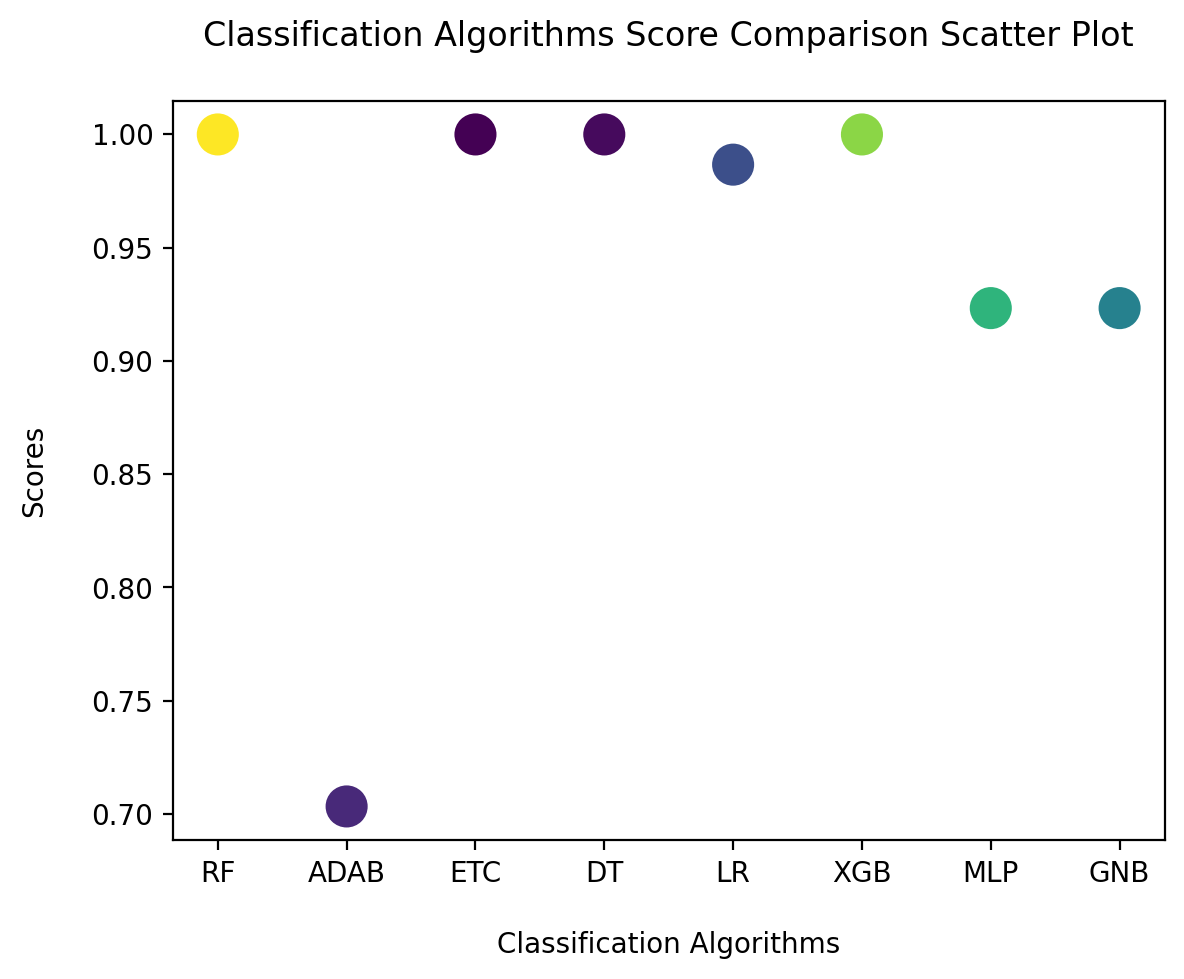

In [129]:
# Scatter Plot
colors = np.random.rand(8)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Scatter Plot\n')
plt.scatter(x, y, s=200, c=colors)
plt.show()
print('\n')

In [146]:
#Building a Neural Network Model

In [179]:
!pip install tensorflow

In [134]:
import tensorflow as tf

In [131]:
!pip install keras

     ---------------------------------------- 1.7/1.7 MB 1.8 MB/s eta 0:00:00


In [177]:
a = df.drop("Level", axis = 1)
b = pd.get_dummies(df["Level"])
# tf.reshape(a, [None, 24])
# a = a.values
# a
# b = b.values
# b
# a = tf.expand_dims(a, axis=0)
# b = tf.expand_dims(b, axis=0)


In [172]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(8, activation = "relu", input_dim = df.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 8)                 200       
                                                                 
 dense_37 (Dense)            (None, 16)                144       
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_38 (Dense)            (None, 8)                 136       
                                                                 
 dense_39 (Dense)            (None, 3)                 27        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________


In [178]:
history = model.fit(a, b, epochs = 40, validation_split = 0.2)

Epoch 1/40


ValueError: in user code:

    File "C:\Users\balod\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\balod\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\balod\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\balod\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\balod\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\balod\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_10" is incompatible with the layer: expected shape=(None, 24), found shape=(32, 23)
